# Лабораторная работа №6 "Поиск экстремума функции многих переменных"
### Выполнил студент 430 группы Королев Алексей
### Вариант 25

1.Выполнить задание, указанное в билете.

   Найти точку максимума функции $ f(x1, x2, x3) = 3,2 - (x_1-1)^2 -(x_2-3)^2 -4(x_3+5)^2; [x_1^0=4,x_2^0=-1,x_3^0=2] $ методом сопряженных градиентов. В окрестности точки максимума оценить овражность, построить линии уровня и траекторию поиска. Исследовать условия сходимости.
   
2.Обеспечить работу программы с исходной функцией в режиме "черного ящика".

3.Обеспечить работу программы с функциями с размерностью на единицу выше заданной.

4.Обеспечить работу программы с функциями любой размерности (до 10-ой включительно).

Рассмотрим задачу нахождения безусловного минимума функции
f(x) векторного аргумента $x = ${$x_1, x_2, ..., x_n$}, заданной на всем
пространстве $R^n$, символически записываемую в виде
$$f(x) → min, x ∈ R^n. (1)$$
Напомним, что точка $ ¯x$ называется точкой локального минимума в
задаче, если существует число ϵ > 0 такое, что для всех x удовлетворяющих условию $ ∥x− ¯x∥ ≤ ϵ$, выполнено неравенство $f(x)≥f(¯x)$; здесь и далее$∥x∥=${$x^2_1+. . .+x^2_n$}$^{\frac{1}{2}}$.
Точка x называется точкой глобального минимума в задаче (1), если $f(¯x) ≤ f(x)$, x ∈ $R^n.$
Для численного решения задачи (1) обычно строят некоторую
последовательность векторов {$x^k$}$_{k=0}^∞ $, обрывая процесс построения
тогда, когда появляется уверенность, что последний из постренных
элементов последовательности близок к точке минимума в том или
ином смысле. Например, если элемент $x^k$ удовлетворяет неравен
ству $ ∥x^k −¯x∥ < δ$, где x- точка минимума в задаче (1), δ- некоторое
положительное число, то говорят, что $x^k$ есть приближенное реше
ние задачи (1) с точностью δ по аргументу. Если же выполняется
неравенство $ |f(x^k) − ¯f| < ¯δ$, где $¯f$- минимальное значение функции
f(x) в $R^n$, то говорят, что число $f(x^k)$ дает приближенное решение
задачи (1) с точностью $ ¯δ$ по функции.
Большинство процессов, используемых для приближенного реше
ния задачи (1) можно представить как итерационные в виде
$$x^{k+1} = x^k + α_kp^k, (2)$$
где $p^k$ - вектор, определяющий направление движения от точки $x^k$
к точке $x^{k+1}$, $α_k$ - числовой множитель, величина которого задает
длину шага в направлении $p^k$. В различных итерационных процес
сах типа (2) для нахождения $α_k$ и $p^k$ привлекаются различные све
дения о минимизируемой функции f(x). Процессы, использующие
для этого только значения самой функции, называются процесса
ми нулевого порядка или методами поиска. Процессы, требующие
3 вычисления производных f(x) до m-го порядка включительно, на
зывают процессами m-го порядка. Если для определения $a_k $ и $ p^k$
используется информация, полученная на S предыдущих итераци
ях, то итерационный процесс называется S-шаговым.
В качестве направления $p^k$ естественно выбирать направление
убывания функции f(x). Такое направление называют направлением спуска.

Метод сопряженных градиентов. В этом методе $α_k$ выбирается, как и в методе наискорейшего спуска, из условия
$$ f(x^k + α_kp^k) = min_{α>0} f(x^k + αp^k) $$
При этом вектор $p^k$ зависит не только от
градиента функции $f(x^k)$, но и от градиента в предыдущей точке
$∇f(x^{k−1})$ (т.е. метод является двухшаговым), и строится по
правилу
$$ p^k=−∇f(x^k) + β_kp^{k−1} $$

$$ β_0 = 0, β_k = \frac{(∇f(x^k);∇f(x^k)−∇f(x^{k-1}))}{∥∇f(x^{k-1})∥^2}
 , k = 1, 2, . . . ; $$

In [16]:
import math 
import matplotlib.pyplot as plt 
import numpy as np 
%matplotlib inline

In [4]:
#рабочая версия программы
def gradx1(x1):
    return -2.0*(x1-1.0)
def gradx2(x2):
    return -2.0*(x2-3.0)
def gradx3(x3):
    return -8.0*(x3+5.0)
def powermodgrad(x1,x2,x3):
    return ((gradx1(x1))**2.0)+((gradx2(x2))**2.0)+((gradx3(x3))**2.0)

In [5]:
# def gradx1(x1):
#     return 3.0*(x1)
# def gradx2(x2):
#     return 4.0*(4.0-x2)
# def gradx3(x3):
#     return -2.0*(x3+3.0)
# def powermodgrad(x1,x2,x3):
#     return ((gradx1(x1))**2.0)+((gradx2(x2))**2.0)+((gradx3(x3))**2.0)

In [6]:
#рабочая версия программы
def f(x1,x2,x3):
    return 3.2-((x1-1.0)**2.0)-((x2-3.0)**2.0)-(4.0*((x3+5.0)**2.0))

In [7]:
# def f(x1,x2,x3):
#     return (1.5*(x1**2.0))-(2.0*((4.0-x2)**2.0))-((3.0+x3)**2.0)

In [8]:
def B(x1,x10,x2,x20,x3,x30):
    return ((gradx1(x1)*(gradx1(x1)-gradx1(x10)))+(gradx2(x2)*(gradx2(x2)-gradx2(x20)))+(gradx3(x3)*(gradx3(x3)-gradx3(x30))))/(q)
def p1(x1,x10):
    return (-1)*gradx1(x1)+(B(x1,x10,x2,x20,x3,x30)*p10)
def p2(x2,x20):
    return (-1)*gradx2(x2)+(B(x1,x10,x2,x20,x3,x30)*p20)
def p3(x3,x30):
    return (-1)*gradx3(x3)+(B(x1,x10,x2,x20,x3,x30)*p30)

In [9]:
e=0.001
x10=4.0
x20=-1.0
x30=2.0
x1=x10
x2=x20
x3=x30
x11=x10
x22=x20
x33=x30
k=0.0
fx1=[]
fx2=[]
fx3=[]
#while (abs(gradx1(x11))>e or abs(gradx2(x22))>e or abs(gradx3(x33))>e):
while (abs(f(x1,x2,x3)-f(x10,x20,x30))>e) or k==0.0:
    k=k+1
    print('k',k)
    q=powermodgrad(x10,x20,x30)
    if k==1.0:
        p10=0.0
        p20=0.0
        p30=0.0
    else:
        p10=p1(x10,x100)
        p20=p2(x20,x200)
        p30=p3(x30,x300)
    if k==1.0:
        a=0.1000
    else:
        for J in range (-100, 100):
            I=J/10.0
            y=gradx1(I)
            z=gradx1(I+1)
#             n=diff(lambda x2: gradx2(x2), I)
#             m=diff(lambda x2: gradx2(x2), I+1)
            if y*z<0:
                Q1=I
                Q2=I+1
                break
        a=Q1
        b=Q2
        for q in range (1, 200):
            K=(a+b)/2.0
            i=gradx1(K)
            j=gradx1(a)
            if j*i>0:
                a=K
            if j*i<0:
                b=K
            if abs(i)<e:
                break
#         print('K',K)
#         print('x1',x1)
#         print('p1',p1(x1,x10))
        if p1(x1,x10)==0:
            a=0
        else:
            a=(K-x1)/(p1(x1,x10))
    x11=x1+(a*p1(x1,x10))
#     print('x1')
#     print(gradx1(x11))
#     print(gradx1(x1))
    if abs(gradx1(x11))>abs(gradx1(x1)):
        x11=x1-(a*p1(x1,x10))
    print('x1',x1,'x11',x11)
    if k==1.0:
        a=0.10000
    else:
        for J in range (-100, 100):
            I=J/10.0
            y=gradx2(I)
            z=gradx2(I+1)
#             n=diff(lambda x2: gradx2(x2), I)
#             m=diff(lambda x2: gradx2(x2), I+1)
            if y*z<0:
                Q1=I
                Q2=I+1
                break
        a=Q1
        b=Q2
        for P in range (1, 200):
            K=(a+b)/2.0
            i=gradx2(K)
            j=gradx2(a)
            if j*i>0:
                a=K
            if j*i<0:
                b=K
            if abs(i)<e:
                break
#         print('K',K)
#         print('x2',x2)
#         print('p2',p2(x2,x20))
        if p2(x2,x20)==0:
            a=0
        else:
            a=(K-x2)/(p2(x2,x20))
        #a=(3-x2)/p2(x2,x20)
    x22=x2+(a*p2(x2,x20))
#     print('x2')
#     print(gradx1(x22))
#     print(gradx1(x2))
    if abs(gradx2(x22))>abs(gradx2(x2)):
        x22=x2-(a*p2(x2,x20))
    print('x2',x2,'x22',x22)
    if k==1.0:
        a=0.10000
    else:
        for J in range (-100, 100):
            I=J/10.0
            y=gradx3(I)
            z=gradx3(I+1)
#             n=diff(lambda x2: gradx2(x2), I)
#             m=diff(lambda x2: gradx2(x2), I+1)
            if y*z<0:
                Q1=I
                Q2=I+1
                break
        a=Q1
        b=Q2
        for q in range (1, 200):
            K=(a+b)/2.0
            i=gradx3(K)
            j=gradx3(a)
            if j*i>0:
                a=K
            if j*i<0:
                b=K
            if abs(i)<e:
                break
#         print('K',K)
#         print('x3',x3)
#         print('p3',p3(x3,x30))
        if p3(x3,x30)==0:
            a=0
        else:
            a=(K-x3)/(p3(x3,x30))
    x33=x3+(a*p3(x3,x30))
#     print('x3')
#     print(gradx1(x33))
#     print(gradx1(x3))
    if abs(gradx3(x33))>abs(gradx3(x3)):
        x33=x3-(a*p3(x3,x30))
    print('x3',x3,'x33',x33)
    fx1.append(x1)
    fx2.append(x2)
    fx3.append(x3)
    x100=x10
    x200=x20
    x300=x30
    x10=x1
    x20=x2
    x30=x3
    x1=x11
    x2=x22
    x3=x33
#     print(gradx1(x1))
#     print(gradx2(x2))
#     print(gradx3(x3))
    print(f(x1,x2,x3), f(x10,x20,x30))
#     if k==1000:
#         break
#    print('')
fx1.append(x1)
fx2.append(x2)
fx3.append(x3)
print(k)
print(x10,x20,x30)
print(x1,x2,x3)

k 1.0
x1 4.0 x11 3.4
x2 -1.0 x22 -0.19999999999999996
x3 2.0 x33 -3.6000000000000005
-20.639999999999993 -217.8
k 2.0
x1 3.4 x11 1.000390625
x2 -0.19999999999999996 x22 3.0003906249999996
x3 -3.6000000000000005 x33 -5.00009765625
3.199999656677246 -20.639999999999993
k 3.0
x1 1.000390625 x11 1.000390625
x2 3.0003906249999996 x22 3.000390624999999
x3 -5.00009765625 x33 -5.00009765625
3.199999656677246 3.199999656677246
3.0
1.000390625 3.0003906249999996 -5.00009765625
1.000390625 3.000390624999999 -5.00009765625


In [10]:
print(fx1)
print('')
print(fx2)
print('')
print(fx3)

[4.0, 3.4, 1.000390625, 1.000390625]

[-1.0, -0.19999999999999996, 3.0003906249999996, 3.000390624999999]

[2.0, -3.6000000000000005, -5.00009765625, -5.00009765625]


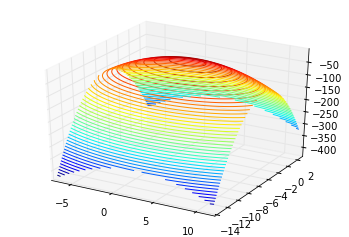

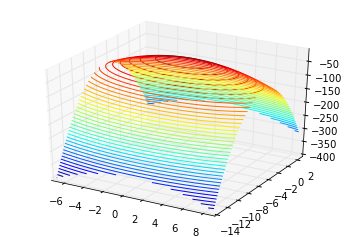

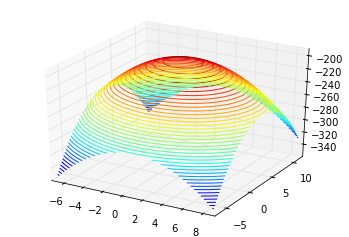

In [11]:
x10=4.0
x20=-1.0
x30=2.0
from mpl_toolkits.mplot3d import Axes3D
x = np.arange(-7.0, 12.0, 0.2)
y = np.arange(-14.0, 3.0, 0.2)
[X,Y] = np.meshgrid(x,y)
Z=3.2-((x10-1.0)**2.0)-((X-3.0)**2.0)-(4.0*((Y+5.0)**2.0))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
CS=plt.contour(X,Y,Z,45)
ax.clabel(CS, fontsize=9, inline=1)
plt.clabel(CS,fmt="%1.1f",fontsize=9)
plt.show()

x = np.arange(-7.0, 9.0, 0.2)
y = np.arange(-14.0, 3.0, 0.2)
[X,Y] = np.meshgrid(x,y)
Z=3.2-((X-1.0)**2.0)-((x20-3.0)**2.0)-(4.0*((Y+5.0)**2.0))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
CS=plt.contour(X,Y,Z,45)
ax.clabel(CS, fontsize=9, inline=1)
plt.clabel(CS,fmt="%1.1f",fontsize=9)
plt.show()

x = np.arange(-7.0, 9.0, 0.2)
y = np.arange(-7.0, 12.0, 0.2)
[X,Y] = np.meshgrid(x,y)
Z=3.2-((X-1.0)**2.0)-((Y-3.0)**2.0)-(4.0*((x30+5.0)**2.0))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
CS=plt.contour(X,Y,Z,45)
ax.clabel(CS, fontsize=9, inline=1)
plt.clabel(CS,fmt="%1.1f",fontsize=9)
plt.show()

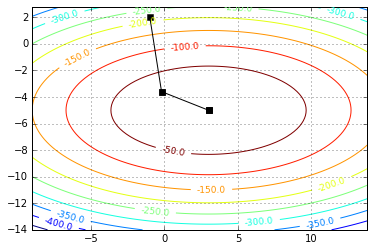

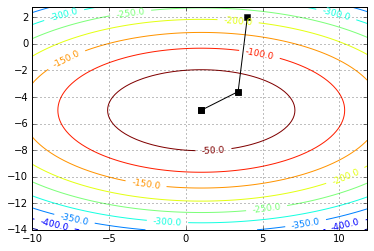

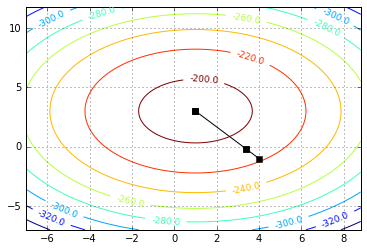

In [12]:
x10=4.0
x20=-1.0
x30=2.0

for u in range (1,4):
    v1=fx2[u-1]
    v2=fx2[u]
    V1=fx3[u-1]
    V2=fx3[u]
    plt.plot([v1, v2], [V1, V2],'k')
    plt.plot([v1, v2], [V1, V2],'sk')
x = np.arange(-9.0, 14.0, 0.2)
y = np.arange(-14.0, 3.0, 0.2)
[X,Y] = np.meshgrid(x,y)
Z=3.2-((x10-1.0)**2.0)-((X-3.0)**2.0)-(4.0*((Y+5.0)**2.0))
CS=plt.contour(X,Y,Z,10)
plt.clabel(CS,fmt="%1.1f",fontsize=9)
plt.grid() 
plt.show()

for u in range (1,4):
    v1=fx1[u-1]
    v2=fx1[u]
    V1=fx3[u-1]
    V2=fx3[u]
    plt.plot([v1, v2], [V1, V2],'k')
    plt.plot([v1, v2], [V1, V2],'sk')
x = np.arange(-10.0, 12.0, 0.2)
y = np.arange(-14.0, 3.0, 0.2)
[X,Y] = np.meshgrid(x,y)
Z=3.2-((X-1.0)**2.0)-((x20-3.0)**2.0)-(4.0*((Y+5.0)**2.0))
CS=plt.contour(X,Y,Z,10)
plt.clabel(CS,fmt="%1.1f",fontsize=9)
plt.grid() 
plt.show()

for u in range (1,4):
    v1=fx1[u-1]
    v2=fx1[u]
    V1=fx2[u-1]
    V2=fx2[u]
    plt.plot([v1, v2], [V1, V2],'k')
    plt.plot([v1, v2], [V1, V2],'sk')
x = np.arange(-7.0, 9.0, 0.2)
y = np.arange(-7.0, 12.0, 0.2)
[X,Y] = np.meshgrid(x,y)
Z=3.2-((X-1.0)**2.0)-((Y-3.0)**2.0)-(4.0*((x30+5.0)**2.0))
CS=plt.contour(X,Y,Z,10)
plt.clabel(CS,fmt="%1.1f",fontsize=9)
plt.grid() 
plt.show()

11 переменных v x1O O,a ne 0

In [13]:
#начальные данные программы
X0=[4.0,-1.0,2.0,4.0,-1.0,2.0,4.0,-1.0,2.0,4.0]
def f(X):
    return 5.678-((X[0]-1.1)**2.0)-((X[1]-3.0)**2.0)-(4.0*((X[2]+6.7)**2.0))-((X[3]-1.0)**2.0)-((X[4]-1.0)**2.0)-((X[5]-1.0)**2.0)-((X[6]+5.5)**2.0)-((X[7]-1.0)**2.0)-((X[8]-3.2)**2.0)-((X[9] - 1.0)**2.0)

In [14]:
#f - функция
#e - точность метода
#h - шаг при взятии производной
#n - количество переменных в f
#Х0 - начальные точки

def EXT(f,e,h,n,X0):
    
    #j - номер корня, по которому берем производную
    def derivative(f,j,X):
        Xzero=np.array([0.0 for k in range (n)])
        Xh=Xzero
        i=j-1
        Xh[i]=Xzero[i]+h
        Xx=X+Xh
        return (f(Xx)-f(X))/h
    
    #i - количество корней
    def powermodgrad(i):
        if i == 1: 
            return (derivative(f,i,X1))**2
        else:
            return powermodgrad(i-1)+((derivative(f,i,X1))**2)
    
    def B(i):
        if i == 1: 
            return ((derivative(f,i,X1))*((derivative(f,i,X1))-(derivative(f,i,X0))))/q
        else:
            return B(i-1)+(((derivative(f,i,X1))*((derivative(f,i,X1))-(derivative(f,i,X0))))/q)
        
    X1=X0
    X11=X0
#     print(X0)
#     print(X1)
#     print(X11)
    p=[0.0 for R in range (n)]
    k=0.0
    while (abs(f(X1)-f(X0))>e) or k==0.0:
        k=k+1
        #print('k',k)
        q=powermodgrad(n)
        z=B(n)
        if k==1.0:
            for I in range(0,n):
                p[I]=0.0
            P=np.array([((-1)*derivative(f,K+1,X1))+(z*p[K]) for K in range (n)])
    #         print('P',P)
        else:
            for I in range(0,n):
                p[I]=Plast[I]
                P=np.array([((-1)*derivative(f,K+1,X1))+(z*p[K]) for K in range (n)])
        Plast=np.array([P[I] for I in range (n)])
        for L in range (0,n):
            for J in range (-100, 100):
                I=J/10.0
                XI=np.array([I for R in range (n)])
                y=derivative(f,L+1,XI)
                XI1=np.array([I+1 for R in range (n)])
                z=derivative(f,L+1,XI1)
                if y*z<0:
                    Q1=I
                    Q2=I+1
                    break
            a=Q1
            b=Q2
            for q in range (1, 200):
                K=(a+b)/2.0
                XK=np.array([K for R in range (n)])
                i=derivative(f,L+1,XK)
                Xa=np.array([a for R in range (n)])
                j=derivative(f,L+1,Xa)
                if j*i>0:
                    a=K
                if j*i<0:
                    b=K
                if abs(i)<e:
    #                 print(K)
                    break
            if P[L]==0.0:
                a=0.0
            else:
                a=(K-X1[L])/(P[L])
    #                 print('a',a)
            X11[L]=X1[L]+(a*P[L])
    #         print('P[L]',P[L])
    #         print(X11[L])
    #         print(X1[L])
            if abs(derivative(f,L+1,X11))>abs(derivative(f,L+1,X1)):
                X11[L]=X1[L]-(a*P[L])
        X00=X0
        X0=X1
        X1=X11
    #     if k==5.0:
    #         break
    print('Номер иттерации', k), print('Точки экстремума', X1), print('f(предпоследней иттерации)', f(X0)), print('f(последней иттерации)', f(X1))
    return 'end'

In [15]:
print(EXT(f,0.001,0.000001,10,X0))

Номер иттерации 1.0
Точки экстремума [1.0995117187499996, 2.99951171875, -6.7001220703124993, 0.99951171875000044, 0.99951171875, 0.99951171875, -5.50048828125, 0.99951171875, 3.1995117187500002, 0.99951171875000044]
f(предпоследней иттерации) 5.67799779463
f(последней иттерации) 5.67799779463
end
